<a href="https://colab.research.google.com/github/rajanpandi/dvd_data/blob/main/final_proj_classification(95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/combine1_data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head(1)

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id,return_date,staff_id,amount,payment_id,payment_date,actor_id,first_name,last_name,name-2
0,11.0,Horror,749.0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006.0,1.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,2005-06-15 23:57:20,341.0,2005-06-24 23:46:20,1.0,7.99,17503.0,2007-02-15 22:25:46.996577,161.0,Harvey,Hope,English


In [5]:
df1=df.loc[:,["category_id","rating","customer_id","actor_id","rental_duration","rental_rate","length","inventory_id","store_id"]]

In [6]:
df1.head(1)

,category_id,rating,customer_id,actor_id,rental_duration,rental_rate,length,inventory_id,store_id
0,11.0,R,341.0,161.0,6.0,4.99,153.0,3419.0,1.0


In [7]:
df1.dtypes

,0
category_id,float64
rating,object
customer_id,float64
actor_id,float64
rental_duration,float64
rental_rate,float64
length,float64
inventory_id,float64
store_id,float64


In [8]:
df1.isnull().sum()

,0
category_id,5
rating,5
customer_id,231
actor_id,45
rental_duration,5
rental_rate,5
length,5
inventory_id,221
store_id,221


In [9]:
df1.dropna(inplace=True)

In [10]:
df1.duplicated().sum()

24

In [11]:
df1.drop_duplicates(inplace=True)

In [12]:
df1.shape

(87980, 9)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
for i in df1.columns:
  df1[i]=le.fit_transform(df1[i])

In [15]:
x=df1.drop("category_id",axis=1)
y=df1["category_id"]

In [16]:
from keras.utils import to_categorical
y_new=to_categorical(y)

In [17]:
y_new.shape

(87980, 16)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaler=sc.fit_transform(x)

In [20]:
x_scaler

array([[ 1.41055496,  0.25435651,  1.05529736, ...,  0.93570764,
         0.85160478, -1.01708154],
       [ 1.41055496,  0.25435651,  0.45775759, ...,  0.93570764,
         0.85160478, -1.01708154],
       [ 1.41055496,  0.25435651, -0.42097737, ...,  0.93570764,
         0.85160478, -1.01708154],
       ...,
       [-1.49263831, -1.23183946, -0.22765568, ..., -0.89146716,
         1.61236693, -1.01708154],
       [-1.49263831, -1.23183946, -0.40340267, ..., -0.89146716,
         1.61236693, -1.01708154],
       [-1.49263831, -1.23183946, -1.51060871, ..., -0.89146716,
         1.61236693, -1.01708154]])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y_new,test_size=0.25,random_state=0)

In [33]:
x_train.shape

(65985, 8)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU
import tensorflow as tf

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
model = Sequential()
#input dimension 8 neuron - developer scope
model.add(Dense(512,input_dim = x_train.shape[1],activation='tanh')) #hidden layer1
model.add(Dense(512,activation='tanh')) #hidden layer2
model.add(Dense(256,activation='tanh')) #hidden layer3
model.add(Dense(128,activation='tanh')) #hidden layer3
model.add(Dense(64,activation='tanh')) #hidden layer3
model.add(Dense(64,activation='tanh')) #hidden layer3
model.add(Dense(32,activation='tanh')) #hidden layer3
model.add(Dense(32,activation='tanh')) #hidden layer3

model.add(Dense(16,activation="softmax")) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [36]:
result=model.fit(x_train,y_train,epochs=5,validation_split=.2,batch_size=32,verbose=1)

Epoch 1/5
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.2715 - f1_score: 0.2578 - loss: 2.3322 - precision_1: 0.5765 - recall_1: 0.0660 - val_accuracy: 0.8422 - val_f1_score: 0.8392 - val_loss: 0.6027 - val_precision_1: 0.9071 - val_recall_1: 0.7654
Epoch 2/5
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8826 - f1_score: 0.8796 - loss: 0.4351 - precision_1: 0.9211 - recall_1: 0.8381 - val_accuracy: 0.9399 - val_f1_score: 0.9384 - val_loss: 0.2199 - val_precision_1: 0.9539 - val_recall_1: 0.9215
Epoch 3/5
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9385 - f1_score: 0.9368 - loss: 0.2103 - precision_1: 0.9500 - recall_1: 0.9272 - val_accuracy: 0.9431 - val_f1_score: 0.9417 - val_loss: 0.2024 - val_precision_1: 0.9543 - val_recall_1: 0.9316
Epoch 4/5
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9514 - f1_score: 0.9501 - loss: 0.1677 - precision_1: 0.9584 - recall_1: 0.9451 - val_accuracy: 0.9548 - val_f1_score: 0.9539 - val_loss: 0.14

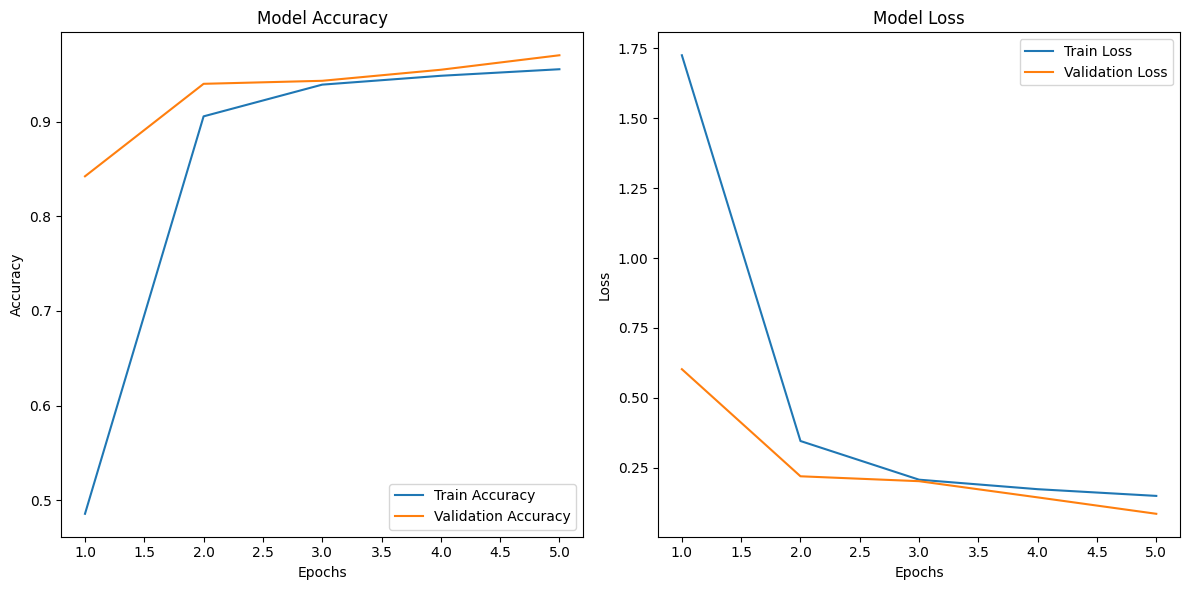

In [39]:
# Create a DataFrame from the training history
result_df1 = pd.DataFrame(result.history)

import matplotlib.pyplot as plt

# Determine the number of epochs based on the length of accuracy data
epochs = range(1, len(result_df1["accuracy"]) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, result_df1["accuracy"], label="Train Accuracy")
plt.plot(epochs, result_df1["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, result_df1["loss"], label="Train Loss")
plt.plot(epochs, result_df1["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [40]:
eval = model.evaluate(x_test,y_test)
eval

688/688 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9675 - f1_score: 0.9665 - loss: 0.0926 - precision_1: 0.9699 - recall_1: 0.9648


[0.09003795683383942,
 <tf.Tensor: shape=(16,), dtype=float32, numpy=
 array([0.9691842 , 0.96300894, 0.9419919 , 0.94539654, 0.9473684 ,
        0.9746995 , 0.9838868 , 0.9683988 , 0.97951716, 0.96533567,
        0.97419083, 0.966312  , 0.96307933, 0.982355  , 0.9848749 ,
        0.96191245], dtype=float32)>,
 0.967810869216919,
 0.9702576994895935,
 0.9655376076698303]

In [42]:
yp=model.predict(x_test)
yp[:2]

688/688 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[2.1493863e-05, 7.2910973e-07, 1.4636149e-04, 2.3363629e-05,
        1.9218847e-04, 9.9902052e-01, 2.1346018e-04, 1.9794436e-04,
        2.0749358e-06, 3.6084083e-07, 6.8845453e-05, 7.3544646e-09,
        6.2954394e-05, 2.3766139e-05, 1.6659536e-05, 9.1642269e-06],
       [4.4071607e-05, 1.3727406e-06, 9.8449421e-01, 2.0048583e-04,
        3.6326531e-04, 4.3764535e-06, 9.9426488e-06, 2.2540313e-05,
        6.9651506e-08, 6.9983333e-05, 2.2656130e-05, 1.2659070e-02,
        3.4621177e-04, 2.7765132e-06, 1.7459065e-03, 1.3021343e-05]],
      dtype=float32)

In [45]:
import pandas as pd
import numpy as np

# Example of how y_pred is generated (based on previous steps)
y_pred = []

for i in yp:
    temp = np.zeros_like(i)  # Create a zero array
    max_index = np.argmax(i)  # Find the index of the max value
    temp[max_index] = 1  # Set the max value to 1
    y_pred.append(temp)  # Append the modified array

# Convert the list of arrays to a numpy array
y_pred = np.array(y_pred)

# Convert the numpy array to a Pandas DataFrame
df_pred = pd.DataFrame(y_pred)

# Output the DataFrame
df_pred[:5]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1607
           1       0.96      0.97      0.96      1605
           2       0.96      0.93      0.94      1395
           3       0.94      0.95      0.95      1244
           4       0.99      0.91      0.95      1162
           5       0.98      0.97      0.97      1588
           6       0.99      0.98      0.98      1530
           7       0.97      0.97      0.97      1429
           8       0.98      0.98      0.98      1364
           9       0.97      0.96      0.97      1147
          10       0.97      0.98      0.97      1215
          11       0.96      0.97      0.97      1122
          12       0.97      0.95      0.96      1287
          13       0.98      0.99      0.98      1381
          14       0.98      0.99      0.98      1707
          15       0.95      0.98      0.96      1212

   micro avg       0.97      0.97      0.97     21995
   macro avg       0.97   

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9678108661059331

# **Drop_out**

In [48]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
model1 = Sequential()
#input dimension 8 neuron - developer scope
model1.add(Dense(128,input_dim = x_train.shape[1],activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(64,input_dim = x_train.shape[1],activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(32,input_dim = x_train.shape[1],activation="relu"))


model1.add(Dense(16,activation="softmax")) #output layer
model1.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
result1=model1.fit(x_train,y_train,epochs=5,validation_split=.2,batch_size=50,verbose=1)

Epoch 1/5
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1031 - f1_score: 0.0769 - loss: 2.7277 - precision_2: 0.0773 - recall_2: 3.3845e-05 - val_accuracy: 0.1958 - val_f1_score: 0.1662 - val_loss: 2.5375 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/5
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1820 - f1_score: 0.1626 - loss: 2.5558 - precision_2: 0.3971 - recall_2: 0.0023 - val_accuracy: 0.2719 - val_f1_score: 0.2552 - val_loss: 2.3333 - val_precision_2: 0.6190 - val_recall_2: 0.0020
Epoch 3/5
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2204 - f1_score: 0.2086 - loss: 2.4223 - precision_2: 0.5007 - recall_2: 0.0107 - val_accuracy: 0.3408 - val_f1_score: 0.3248 - val_loss: 2.1671 - val_precision_2: 0.8309 - val_recall_2: 0.0130
Epoch 4/5
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2582 - f1_score: 0.2482 - loss: 2.3033 - precision_2: 0.5797 - recall_2: 0.0227 - val_accuracy: 0.3965 - val_f1_score: 0.3891 - val_loss: 

In [50]:
result1=model1.fit(x_train,y_train,epochs=50,validation_split=.2,batch_size=50,verbose=1)

Epoch 1/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3133 - f1_score: 0.3053 - loss: 2.1406 - precision_2: 0.6173 - recall_2: 0.0535 - val_accuracy: 0.4788 - val_f1_score: 0.4692 - val_loss: 1.7805 - val_precision_2: 0.8307 - val_recall_2: 0.0721
Epoch 2/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3312 - f1_score: 0.3221 - loss: 2.0755 - precision_2: 0.6249 - recall_2: 0.0704 - val_accuracy: 0.5136 - val_f1_score: 0.5050 - val_loss: 1.7032 - val_precision_2: 0.8600 - val_recall_2: 0.0889
Epoch 3/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3517 - f1_score: 0.3440 - loss: 2.0143 - precision_2: 0.6407 - recall_2: 0.0873 - val_accuracy: 0.5333 - val_f1_score: 0.5228 - val_loss: 1.6088 - val_precision_2: 0.8478 - val_recall_2: 0.1397
Epoch 4/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3629 - f1_score: 0.3560 - loss: 1.9768 - precision_2: 0.6427 - recall_2: 0.1002 - val_accuracy: 0.5686 - val_f1_score: 0.5594 - val_loss: 1.5298 -

In [51]:
result1=model1.fit(x_train,y_train,epochs=50,validation_split=.2,batch_size=5000,verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5440 - f1_score: 0.5393 - loss: 1.4130 - precision_2: 0.7433 - recall_2: 0.3558 - val_accuracy: 0.8106 - val_f1_score: 0.8086 - val_loss: 0.7519 - val_precision_2: 0.9365 - val_recall_2: 0.5976
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5459 - f1_score: 0.5408 - loss: 1.4078 - precision_2: 0.7482 - recall_2: 0.3585 - val_accuracy: 0.8144 - val_f1_score: 0.8122 - val_loss: 0.7468 - val_precision_2: 0.9372 - val_recall_2: 0.6039
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5461 - f1_score: 0.5416 - loss: 1.4070 - precision_2: 0.7443 - recall_2: 0.3555 - val_accuracy: 0.8152 - val_f1_score: 0.8132 - val_loss: 0.7413 - val_precision_2: 0.9384 - val_recall_2: 0.6091
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5501 - f1_score: 0.5459 - loss: 1.3922 - precision_2: 0.7500 - recall_2: 0.3604 - val_accuracy: 0.8153 - val_f1_score: 0.8133 - val_loss: 0.7368 - val_precisi

In [52]:
result1=model1.fit(x_train,y_train,epochs=50,validation_split=.02,batch_size=50,verbose=1)

Epoch 1/50
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5444 - f1_score: 0.5397 - loss: 1.4155 - precision_2: 0.7396 - recall_2: 0.3600 - val_accuracy: 0.8015 - val_f1_score: 0.7999 - val_loss: 0.7597 - val_precision_2: 0.9407 - val_recall_2: 0.6129
Epoch 2/50
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5474 - f1_score: 0.5427 - loss: 1.4071 - precision_2: 0.7443 - recall_2: 0.3618 - val_accuracy: 0.8098 - val_f1_score: 0.8096 - val_loss: 0.7534 - val_precision_2: 0.9375 - val_recall_2: 0.6023
Epoch 3/50
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5448 - f1_score: 0.5398 - loss: 1.4156 - precision_2: 0.7395 - recall_2: 0.3596 - val_accuracy: 0.8106 - val_f1_score: 0.8101 - val_loss: 0.7406 - val_precision_2: 0.9282 - val_recall_2: 0.6068
Epoch 4/50
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5475 - f1_score: 0.5428 - loss: 1.4032 - precision_2: 0.7418 - recall_2: 0.3634 - val_accuracy: 0.8000 - val_f1_score: 0.7974 - val_loss: 0.7429 -

In [ ]:
result1_df=pd.DataFrame(result1.history)

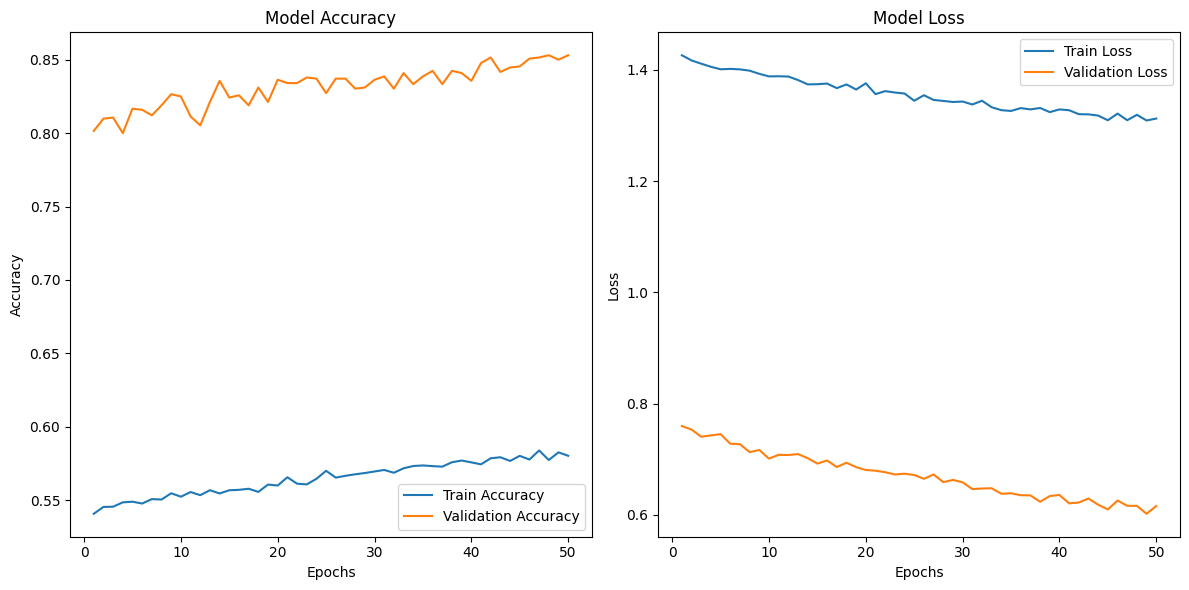

In [54]:
# Create a DataFrame from the training history
result1_df1 = pd.DataFrame(result1.history)

import matplotlib.pyplot as plt

# Determine the number of epochs based on the length of accuracy data
epochs = range(1, len(result1_df1["accuracy"]) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, result1_df1["accuracy"], label="Train Accuracy")
plt.plot(epochs, result1_df1["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, result1_df1["loss"], label="Train Loss")
plt.plot(epochs, result1_df1["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
